In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from tqdm.notebook import tqdm
from sklearn.preprocessing import PolynomialFeatures

In [6]:
def divider():
    print("-----------------------------------")

In [7]:
data: pd.DataFrame = pd.read_csv("data.csv", index_col=0)
print(data.head())

          y        x1        x2        x3        x4        x5        x6  \
0  7.824944 -0.887890  0.949137  0.867185  0.905457 -0.564753  1.064772   
1 -0.284809  0.402109 -0.109812  0.353789 -0.368996  0.484929 -0.872589   
2 -5.551631 -0.114545 -1.603722  0.284455 -0.276847 -1.421414 -1.135600   
3  0.087262  0.832631  0.443724  0.472880  1.260798  0.589971 -0.150165   
4  0.169201  0.318175 -0.042458  0.014656  0.323378  0.425665  0.268726   

         x7        x8        x9       x10  
0  0.871957  0.073367 -0.468684 -1.518201  
1 -0.305881 -0.284581  0.547374 -0.755235  
2 -0.021529 -0.826239  0.647715 -2.370580  
3  1.148314  1.034029 -0.205375 -0.488831  
4  0.177851 -0.128694  0.110501  0.797469  


In [8]:
# Create train and test sets
data_copy = data.copy()
X1 = data_copy['x1']
X2 = data_copy['x2']
X3 = data_copy['x3']
X4 = data_copy['x4']
X5 = data_copy['x5']
y = data_copy['y']

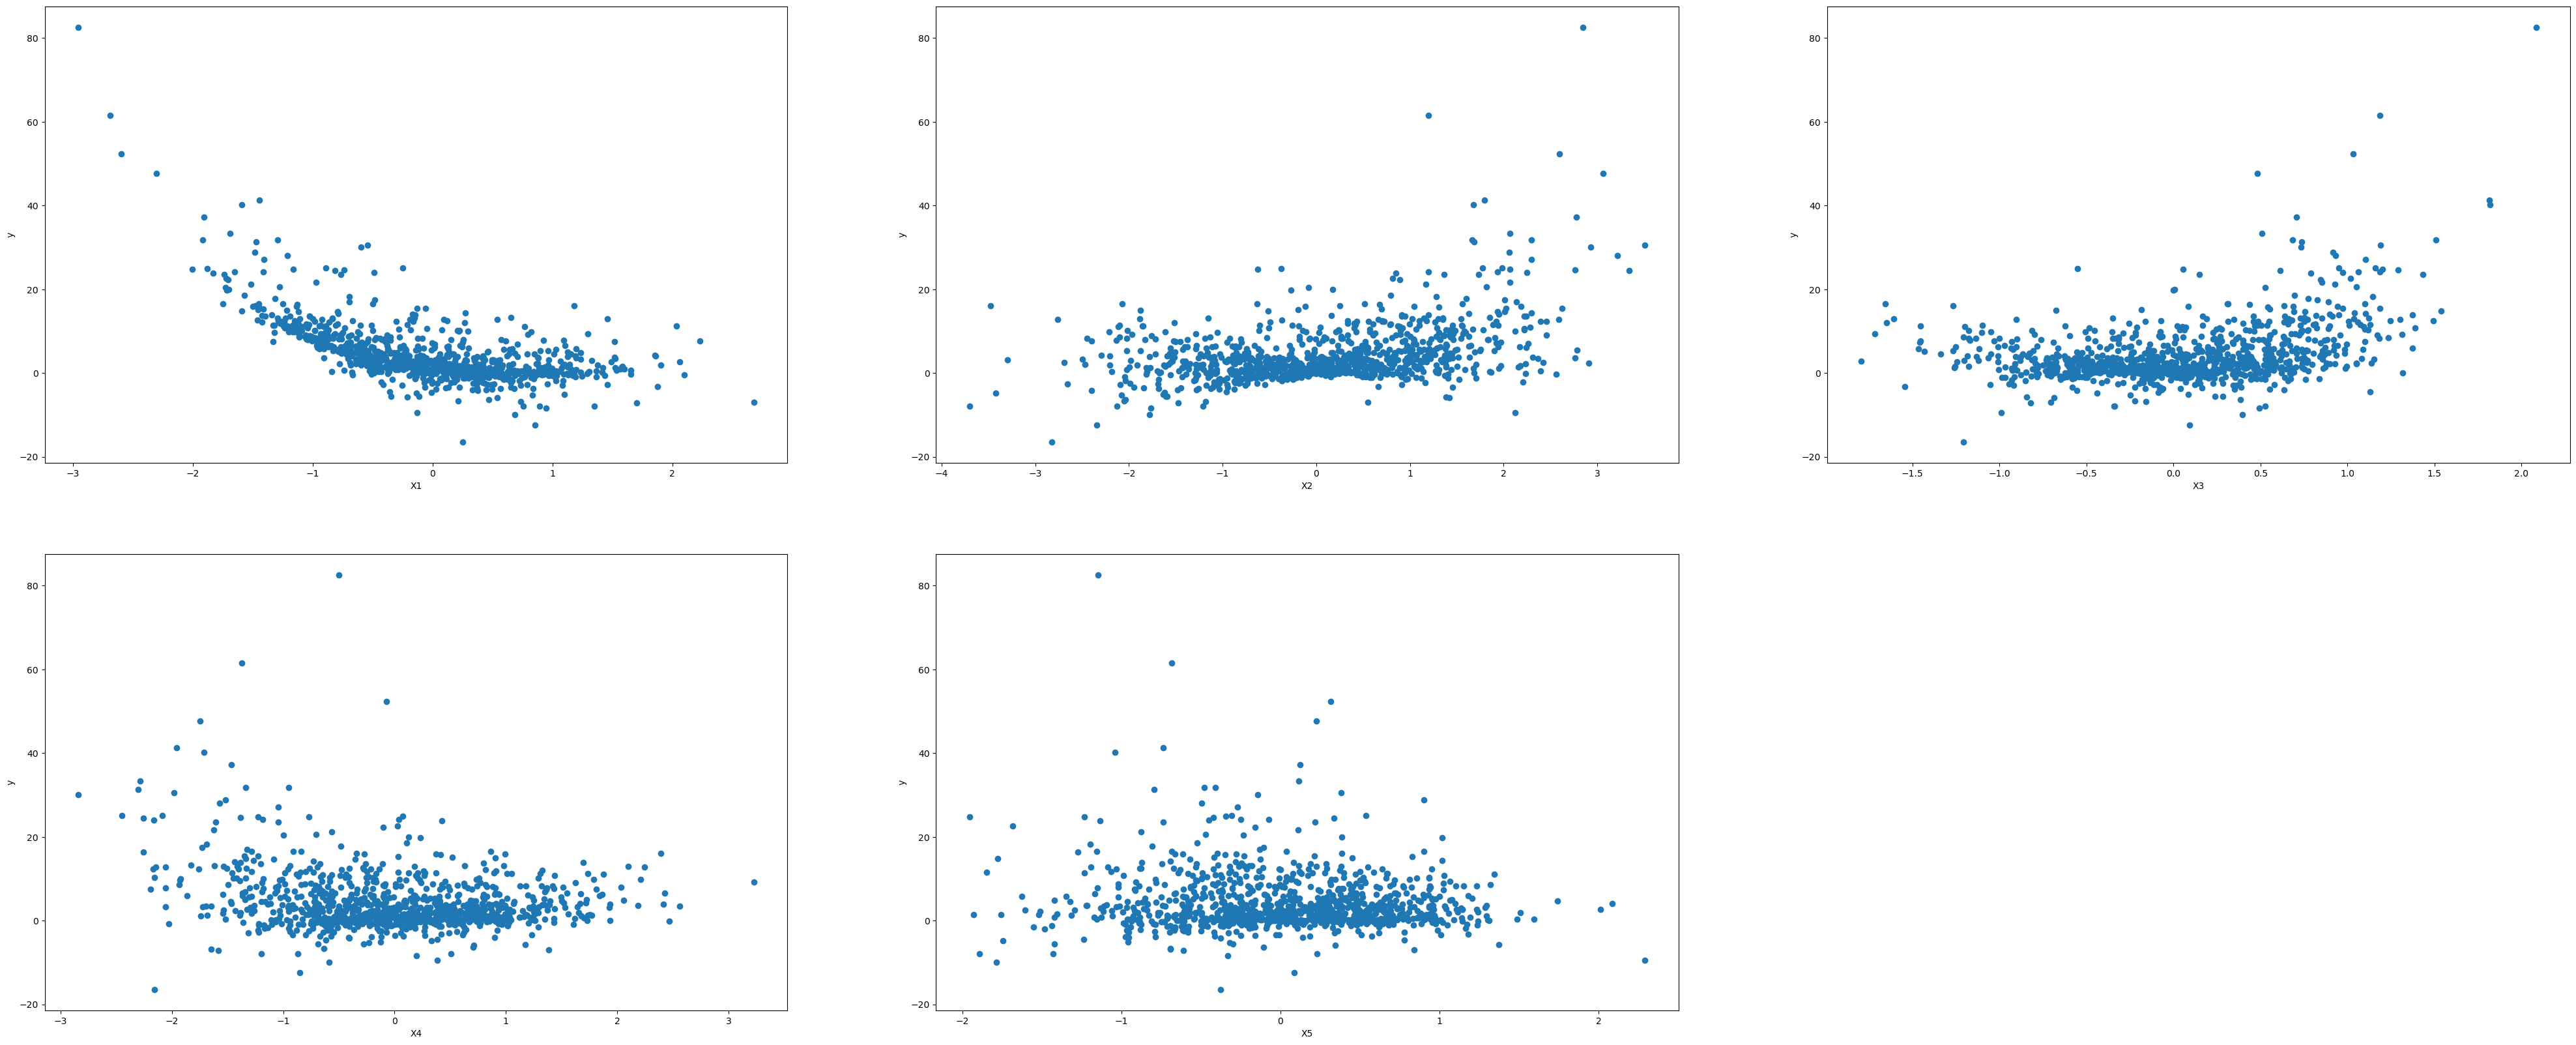

In [9]:
plt.figure(figsize = (50,20))
plt.subplot(2,3,1)
plt.scatter(X1, y)
plt.xlabel("X1")
plt.ylabel("y")

plt.subplot(2,3,2)
plt.scatter(X2, y)
plt.xlabel("X2")
plt.ylabel("y")


plt.subplot(2,3,3)
plt.scatter(X3, y)
plt.xlabel("X3")
plt.ylabel("y")


plt.subplot(2,3,4)
plt.scatter(X4, y)
plt.xlabel("X4")
plt.ylabel("y")


plt.subplot(2,3,5)
plt.scatter(X5, y)
plt.xlabel("X5")
plt.ylabel("y")

plt.show()

In [10]:

splitter = int(0.8 * len(X1))

X1_train = X1[:splitter]
X2_train = X2[:splitter]
X3_train = X3[:splitter]
X4_train = X4[:splitter]
X5_train = X5[:splitter]
y_train = y[:splitter]

X1_test = X1[splitter:]
X2_test = X2[splitter:]
X3_test = X3[splitter:]
X4_test = X4[splitter:]
X5_test = X5[splitter:]
y_test = y[splitter:]
X1

0     -0.887890
1      0.402109
2     -0.114545
3      0.832631
4      0.318175
         ...   
995    0.401581
996    0.859591
997    0.990358
998   -0.498523
999    0.596445
Name: x1, Length: 1000, dtype: float64

In [11]:
print(f"Train data shape: {X1_train.shape} | {y_train.shape}")
print(f"Test data shape: {X1_test.shape} | {y_test.shape}")

print(f"Train Length: {len(X1_train)}")
print(f"Test Length: {len(X1_test)}")

Train data shape: (800,) | (800,)
Test data shape: (200,) | (200,)
Train Length: 800
Test Length: 200


In [19]:
X1_train = torch.tensor(X1_train)
X2_train = torch.tensor(X2_train)
X3_train = torch.tensor(X3_train)
X4_train = torch.tensor(X4_train)
X5_train = torch.tensor(X5_train)
y_train = torch.tensor(y_train)
X1_test = torch.tensor(X1_test)
X2_test = torch.tensor(X2_test)
X3_test = torch.tensor(X3_test)
X4_test = torch.tensor(X4_test)
X5_test = torch.tensor(X5_test)
y_test = torch.tensor(y_test)
type(X1)


C:\Users\YUSSEF\AppData\Local\Temp\ipykernel_20528\190384117.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X1_train = torch.tensor(X1_train)
C:\Users\YUSSEF\AppData\Local\Temp\ipykernel_20528\190384117.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X2_train = torch.tensor(X2_train)
C:\Users\YUSSEF\AppData\Local\Temp\ipykernel_20528\190384117.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X3_train = torch.tensor(X3_train)
C:\Users\YUSSEF\AppData\Local\Temp\ipykernel_20528\190384117.py:4: UserWarning: To copy construct from 

pandas.core.series.Series

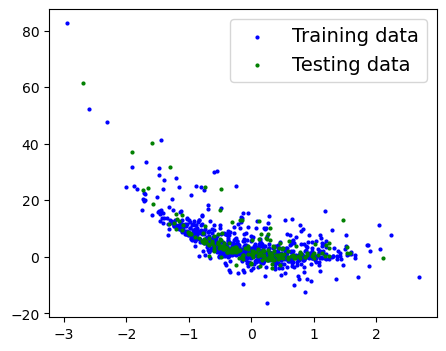

In [20]:
def plot_predictions(train_data: torch.Tensor,
                    train_labels: torch.Tensor,
                    test_data: torch.Tensor,
                    test_labels: torch.Tensor,
                    predictions: torch.Tensor = None):

    plt.figure(figsize=(5, 4))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend(prop={"size": 14});

plot_predictions(train_data=X1_train, train_labels=y_train, test_data=X1_test, test_labels=y_test)

In [21]:
# Build Model
import torch
import torch.nn as nn
class PolynomialRegressionModel(nn.Module):
    def __init__(self):
        super(PolynomialRegressionModel, self).__init__()
        self.weights = nn.Parameter(torch.randn(2, # <- start with random weights (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float
        ))
        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float 
        ))

    def forward(self, x):
        # Calculate the quadratic polynomial using coefficients and powers of x
        y = self.bias + self.weights[0] * x + self.weights[1] * x**2 
        return y

In [47]:
model_1 = PolynomialRegressionModel()
model_2 = PolynomialRegressionModel()
model_3 = PolynomialRegressionModel()
model_4 = PolynomialRegressionModel()
model_5 = PolynomialRegressionModel()

print(f"Model_1 Parameters: {list(model_1.parameters())}")
divider()
print(f"Named Parameters: {model_1.state_dict()}")

Model_1 Parameters: [Parameter containing:
tensor([-1.2701, -0.0052], requires_grad=True), Parameter containing:
tensor([-0.0934], requires_grad=True)]
-----------------------------------
Named Parameters: OrderedDict([('weights', tensor([-1.2701, -0.0052])), ('bias', tensor([-0.0934]))])


In [48]:
#predict 
with torch.inference_mode():
    y_preds_1 = model_1(X1_test)

with torch.inference_mode():
    y_preds_2 = model_2(X2_test)

with torch.inference_mode():
    y_preds_3 = model_3(X3_test)

with torch.inference_mode():
    y_preds_4 = model_4(X4_test)

with torch.inference_mode():
    y_preds_5 = model_5(X5_test)     


print(f"Predicted value: {y_preds_2}")    

Predicted value: tensor([0.7484, 2.1833, 1.1320, 0.1334, 0.9403, 0.5277, 0.1714, 0.1240, 2.0764,
        0.7765, 0.0760, 0.1906, 0.1677, 0.9393, 0.7291, 0.2167, 1.6025, 0.2556,
        0.2123, 0.5454, 0.2179, 0.0729, 0.0731, 1.3055, 0.8424, 1.1234, 0.8461,
        0.7554, 0.1249, 0.2862, 0.5820, 0.0905, 0.3180, 0.3419, 1.0005, 0.9504,
        0.7165, 0.5648, 0.1043, 0.6367, 1.1395, 0.9300, 1.0667, 2.4674, 0.3835,
        0.2993, 1.2655, 0.4778, 0.0999, 0.5602, 0.6644, 0.7136, 1.0531, 0.5079,
        0.7804, 2.2772, 3.2628, 1.8951, 0.7762, 0.6860, 0.1760, 2.1067, 0.2566,
        0.2601, 0.5095, 0.5550, 2.2261, 0.0970, 3.4816, 0.2557, 0.6236, 0.2956,
        0.0706, 0.5944, 0.2435, 2.4841, 0.1758, 1.0307, 0.0724, 0.1125, 0.0759,
        0.4002, 0.2554, 0.2820, 0.0738, 0.3630, 0.0856, 0.2287, 1.1444, 1.1871,
        1.3708, 1.4825, 0.8401, 0.1150, 2.5694, 1.5532, 0.7944, 0.5231, 2.1740,
        1.1634, 1.1524, 1.5753, 0.7842, 0.4098, 0.2938, 0.0973, 0.5389, 0.8221,
        1.1646, 1.0243,

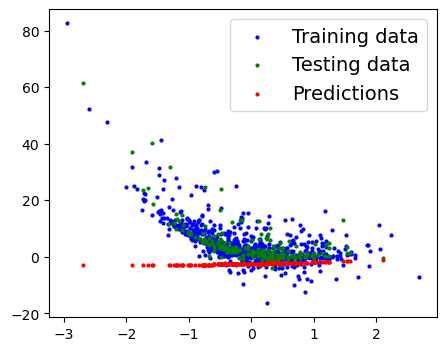

In [24]:
plot_predictions(X1_train, y_train, X1_test, y_test, y_preds_1)

In [25]:
print(f"loss in one value: {y_preds_1[0] - y_test[0]}")

loss in one value: -5.98848954684285


In [26]:
loss_function = nn.MSELoss() # Mean Absolute Error

In [49]:
optimizer_1 = torch.optim.Adamax(model_1.parameters(), 
                            lr = 0.05 
                            )
optimizer_2 = torch.optim.Adamax(model_2.parameters(), 
                            lr = 0.07 
                            )
optimizer_3 = torch.optim.Adamax(model_3.parameters(), 
                            lr = 0.07 
                            )
optimizer_4 = torch.optim.Adamax(model_4.parameters(), 
                            lr = 0.07 
                            )
optimizer_5 = torch.optim.Adamax(model_5.parameters(), 
                            lr = 0.001 
                            )

In [28]:
def train(
        model: nn.Module,
        train_data: torch.Tensor,
        train_labels: torch.Tensor,
        test_data: torch.Tensor,
        test_labels: torch.Tensor,
        loss_function: nn.Module,
        optimizer: torch.optim.Optimizer,
        epochs: int,
    ):
    epochs_count ,train_loss_arr, test_loss_arr = [], [], []
    for epoch in range(epochs+1):
        model.train()
        y_pred = model(train_data)
        loss = loss_function(y_pred, train_labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        with torch.inference_mode():
            y_pred = model(test_data)
            test_loss = loss_function(y_pred, test_labels)

        if epoch % 10 == 0:
            epochs_count.append(epoch)
            train_loss_arr.append(loss.detach().numpy())
            test_loss_arr.append(test_loss.detach().numpy())
            print(f"Epoch {epoch}: MAE Loss: {loss.item():0.2f} | Test Loss: {test_loss.item():0.2f}")
    return epochs_count, train_loss_arr, test_loss_arr

In [29]:
epochs_count_1, train_loss_1, test_loss_1 = train(
                                        model_1, 
                                        train_data=X1_train, 
                                        train_labels=y_train, 
                                        test_data=X1_test, 
                                        test_labels=y_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer_1, 
                                        epochs=1000
                                    )

Epoch 0: MAE Loss: 100.81 | Test Loss: 104.62
Epoch 10: MAE Loss: 84.08 | Test Loss: 87.82
Epoch 20: MAE Loss: 70.23 | Test Loss: 73.78
Epoch 30: MAE Loss: 59.04 | Test Loss: 62.32
Epoch 40: MAE Loss: 50.15 | Test Loss: 53.10
Epoch 50: MAE Loss: 43.19 | Test Loss: 45.75
Epoch 60: MAE Loss: 37.77 | Test Loss: 39.93
Epoch 70: MAE Loss: 33.57 | Test Loss: 35.33
Epoch 80: MAE Loss: 30.33 | Test Loss: 31.70
Epoch 90: MAE Loss: 27.83 | Test Loss: 28.83
Epoch 100: MAE Loss: 25.90 | Test Loss: 26.55
Epoch 110: MAE Loss: 24.42 | Test Loss: 24.75
Epoch 120: MAE Loss: 23.27 | Test Loss: 23.32
Epoch 130: MAE Loss: 22.39 | Test Loss: 22.19
Epoch 140: MAE Loss: 21.71 | Test Loss: 21.28
Epoch 150: MAE Loss: 21.19 | Test Loss: 20.55
Epoch 160: MAE Loss: 20.78 | Test Loss: 19.97
Epoch 170: MAE Loss: 20.47 | Test Loss: 19.50
Epoch 180: MAE Loss: 20.22 | Test Loss: 19.12
Epoch 190: MAE Loss: 20.03 | Test Loss: 18.81
Epoch 200: MAE Loss: 19.89 | Test Loss: 18.57
Epoch 210: MAE Loss: 19.77 | Test Loss: 18.

In [30]:
epochs_count_2, train_loss_2, test_loss_2 = train(
                                        model_2, 
                                        train_data=X2_train, 
                                        train_labels=y_train, 
                                        test_data=X2_test, 
                                        test_labels=y_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer_2, 
                                        epochs=1000
                                    )

Epoch 0: MAE Loss: 84.41 | Test Loss: 86.84
Epoch 10: MAE Loss: 60.22 | Test Loss: 64.92
Epoch 20: MAE Loss: 47.55 | Test Loss: 53.27
Epoch 30: MAE Loss: 41.84 | Test Loss: 47.85
Epoch 40: MAE Loss: 39.64 | Test Loss: 45.64
Epoch 50: MAE Loss: 38.92 | Test Loss: 44.84
Epoch 60: MAE Loss: 38.71 | Test Loss: 44.60
Epoch 70: MAE Loss: 38.64 | Test Loss: 44.54
Epoch 80: MAE Loss: 38.61 | Test Loss: 44.54
Epoch 90: MAE Loss: 38.58 | Test Loss: 44.56
Epoch 100: MAE Loss: 38.56 | Test Loss: 44.59
Epoch 110: MAE Loss: 38.55 | Test Loss: 44.61
Epoch 120: MAE Loss: 38.53 | Test Loss: 44.63
Epoch 130: MAE Loss: 38.52 | Test Loss: 44.64
Epoch 140: MAE Loss: 38.51 | Test Loss: 44.65
Epoch 150: MAE Loss: 38.50 | Test Loss: 44.66
Epoch 160: MAE Loss: 38.49 | Test Loss: 44.66
Epoch 170: MAE Loss: 38.49 | Test Loss: 44.67
Epoch 180: MAE Loss: 38.48 | Test Loss: 44.67
Epoch 190: MAE Loss: 38.48 | Test Loss: 44.68
Epoch 200: MAE Loss: 38.47 | Test Loss: 44.68
Epoch 210: MAE Loss: 38.47 | Test Loss: 44.68

In [31]:
epochs_count_3, train_loss_3, test_loss_3 = train(
                                        model_3, 
                                        train_data=X3_train, 
                                        train_labels=y_train, 
                                        test_data=X3_test, 
                                        test_labels=y_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer_3, 
                                        epochs=1000
                                    )

Epoch 0: MAE Loss: 70.30 | Test Loss: 76.93
Epoch 10: MAE Loss: 60.31 | Test Loss: 65.97
Epoch 20: MAE Loss: 53.40 | Test Loss: 58.39
Epoch 30: MAE Loss: 48.84 | Test Loss: 53.34
Epoch 40: MAE Loss: 45.88 | Test Loss: 50.04
Epoch 50: MAE Loss: 43.94 | Test Loss: 47.86
Epoch 60: MAE Loss: 42.62 | Test Loss: 46.36
Epoch 70: MAE Loss: 41.67 | Test Loss: 45.27
Epoch 80: MAE Loss: 40.94 | Test Loss: 44.43
Epoch 90: MAE Loss: 40.34 | Test Loss: 43.74
Epoch 100: MAE Loss: 39.83 | Test Loss: 43.16
Epoch 110: MAE Loss: 39.39 | Test Loss: 42.64
Epoch 120: MAE Loss: 38.99 | Test Loss: 42.19
Epoch 130: MAE Loss: 38.64 | Test Loss: 41.78
Epoch 140: MAE Loss: 38.32 | Test Loss: 41.40
Epoch 150: MAE Loss: 38.03 | Test Loss: 41.06
Epoch 160: MAE Loss: 37.77 | Test Loss: 40.75
Epoch 170: MAE Loss: 37.53 | Test Loss: 40.47
Epoch 180: MAE Loss: 37.32 | Test Loss: 40.21
Epoch 190: MAE Loss: 37.12 | Test Loss: 39.98
Epoch 200: MAE Loss: 36.95 | Test Loss: 39.77
Epoch 210: MAE Loss: 36.79 | Test Loss: 39.57

In [32]:
epochs_count_4, train_loss_4, test_loss_4 = train(
                                        model_4, 
                                        train_data=X4_train, 
                                        train_labels=y_train, 
                                        test_data=X4_test, 
                                        test_labels=y_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer_4, 
                                        epochs=1000
                                    )

Epoch 0: MAE Loss: 54.62 | Test Loss: 58.91
Epoch 10: MAE Loss: 48.64 | Test Loss: 52.43
Epoch 20: MAE Loss: 46.58 | Test Loss: 49.71
Epoch 30: MAE Loss: 45.87 | Test Loss: 48.43
Epoch 40: MAE Loss: 45.53 | Test Loss: 47.70
Epoch 50: MAE Loss: 45.34 | Test Loss: 47.28
Epoch 60: MAE Loss: 45.26 | Test Loss: 47.04
Epoch 70: MAE Loss: 45.23 | Test Loss: 46.91
Epoch 80: MAE Loss: 45.22 | Test Loss: 46.82
Epoch 90: MAE Loss: 45.21 | Test Loss: 46.76
Epoch 100: MAE Loss: 45.21 | Test Loss: 46.72
Epoch 110: MAE Loss: 45.21 | Test Loss: 46.70
Epoch 120: MAE Loss: 45.21 | Test Loss: 46.68
Epoch 130: MAE Loss: 45.21 | Test Loss: 46.68
Epoch 140: MAE Loss: 45.21 | Test Loss: 46.67
Epoch 150: MAE Loss: 45.21 | Test Loss: 46.67
Epoch 160: MAE Loss: 45.21 | Test Loss: 46.67
Epoch 170: MAE Loss: 45.21 | Test Loss: 46.67
Epoch 180: MAE Loss: 45.21 | Test Loss: 46.67
Epoch 190: MAE Loss: 45.21 | Test Loss: 46.67
Epoch 200: MAE Loss: 45.21 | Test Loss: 46.67
Epoch 210: MAE Loss: 45.21 | Test Loss: 46.67

In [50]:
epochs_count_5, train_loss_5, test_loss_5 = train(
                                        model_5, 
                                        train_data=X5_train, 
                                        train_labels=y_train, 
                                        test_data=X5_test, 
                                        test_labels=y_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer_5, 
                                        epochs=1000
                                    )

Epoch 0: MAE Loss: 72.75 | Test Loss: 78.64
Epoch 10: MAE Loss: 72.61 | Test Loss: 78.50
Epoch 20: MAE Loss: 72.48 | Test Loss: 78.35
Epoch 30: MAE Loss: 72.34 | Test Loss: 78.21
Epoch 40: MAE Loss: 72.20 | Test Loss: 78.07
Epoch 50: MAE Loss: 72.07 | Test Loss: 77.93
Epoch 60: MAE Loss: 71.93 | Test Loss: 77.79
Epoch 70: MAE Loss: 71.79 | Test Loss: 77.65
Epoch 80: MAE Loss: 71.66 | Test Loss: 77.51
Epoch 90: MAE Loss: 71.53 | Test Loss: 77.38
Epoch 100: MAE Loss: 71.39 | Test Loss: 77.24
Epoch 110: MAE Loss: 71.26 | Test Loss: 77.10
Epoch 120: MAE Loss: 71.13 | Test Loss: 76.96
Epoch 130: MAE Loss: 70.99 | Test Loss: 76.83
Epoch 140: MAE Loss: 70.86 | Test Loss: 76.69
Epoch 150: MAE Loss: 70.73 | Test Loss: 76.56
Epoch 160: MAE Loss: 70.60 | Test Loss: 76.42
Epoch 170: MAE Loss: 70.47 | Test Loss: 76.29
Epoch 180: MAE Loss: 70.34 | Test Loss: 76.15
Epoch 190: MAE Loss: 70.21 | Test Loss: 76.02
Epoch 200: MAE Loss: 70.09 | Test Loss: 75.89
Epoch 210: MAE Loss: 69.96 | Test Loss: 75.76

In [34]:
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

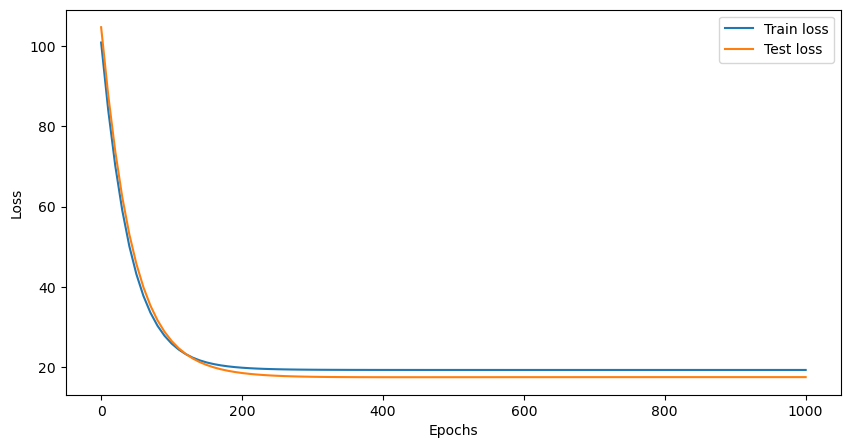

In [35]:
plot_stats(epochs_count_1, train_loss_1, test_loss_1)

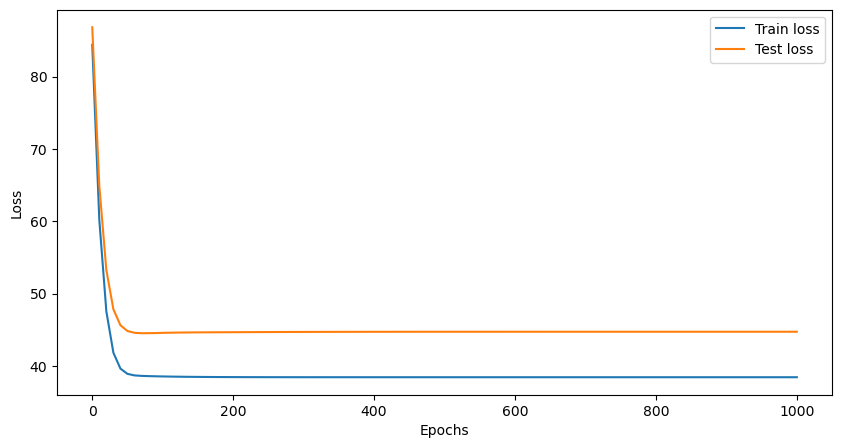

In [36]:
plot_stats(epochs_count_2, train_loss_2, test_loss_2)

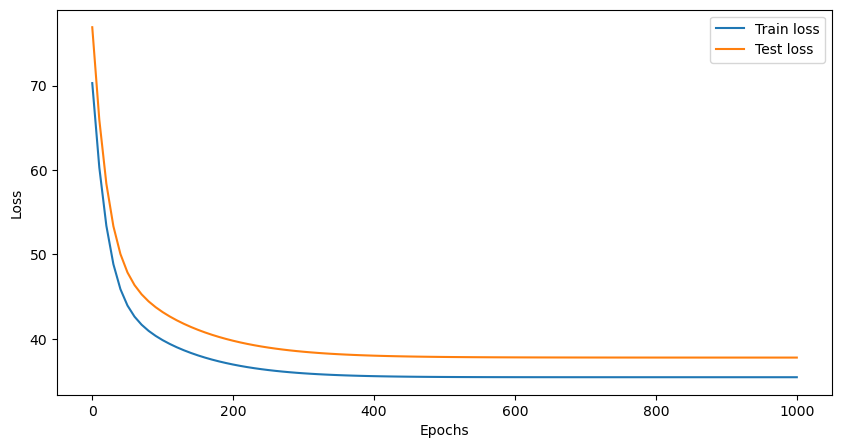

In [37]:
plot_stats(epochs_count_3, train_loss_3, test_loss_3)

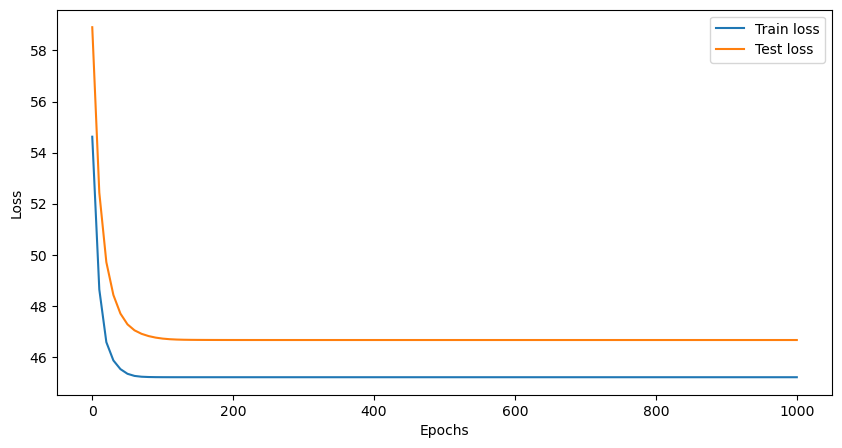

In [38]:
plot_stats(epochs_count_4, train_loss_4, test_loss_4)

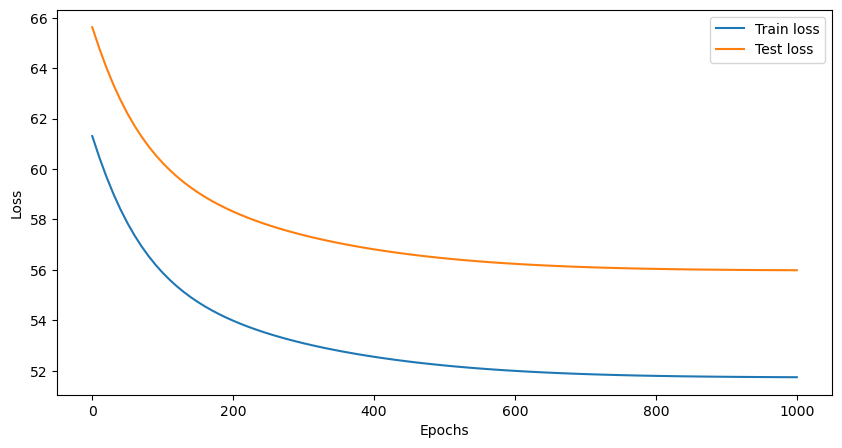

In [46]:
plot_stats(epochs_count_5, train_loss_5, test_loss_5)

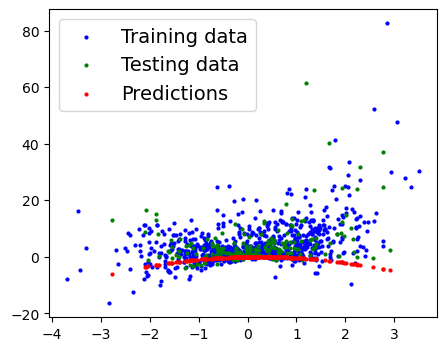

In [40]:
plot_predictions(
    train_data=X2_train,
    train_labels=y_train,
    test_data=X2_test,
    test_labels=y_test,
    predictions=y_preds_2,
)

In [51]:
# Save model
from pathlib import Path

# Create a folder to save our models
model_path = Path('models')
model_path.mkdir(parents=True, exist_ok=True)

# Save the model 1
model_name = 'model_1.pth'
model_save_path = model_path / model_name
print(f"Saving model to: {model_save_path}")
torch.save(model_1.state_dict(), model_save_path)

# Save the model 2
model_name = 'model_2.pth'
model_save_path = model_path / model_name
print(f"Saving model to: {model_save_path}")
torch.save(model_2.state_dict(), model_save_path)

# Save the model 3
model_name = 'model_3.pth'
model_save_path = model_path / model_name
print(f"Saving model to: {model_save_path}")
torch.save(model_3.state_dict(), model_save_path)

# Save the model 4
model_name = 'model_4.pth'
model_save_path = model_path / model_name
print(f"Saving model to: {model_save_path}")
torch.save(model_4.state_dict(), model_save_path)

# Save the model 5
model_name = 'model_5.pth'
model_save_path = model_path / model_name
print(f"Saving model to: {model_save_path}")
torch.save(model_5.state_dict(), model_save_path)

Saving model to: models\model_1.pth
Saving model to: models\model_2.pth
Saving model to: models\model_3.pth
Saving model to: models\model_4.pth
Saving model to: models\model_5.pth
